                                                 STROKE PREDICTION ANALYSIS
                                        
I used this public healthcare dataset from Kaggle. 
The variables were as follows:
gender, age, hypertension, heart_diesease, ever_married, work_type, Residence_Type, avg_glucose_level, bmi, smoking_status, stroke

First step of the analysis process was to clean the data. I identified some null values in the "bmi" variable. I used the median of all the values in that coloumn and replaced the null values with the median.

The next step was to do Bivariate and Multivariate analysis of all the variables. Some interesting things I noticed were as follows:
Age has a comparatively strong relationship with Average Glucose Level, Hypertension, BMI and Stroke. 
We also notice a lot of outliers in Average Glucose Level and BMI. This is beacasue the majority of the population in the dataset is healthy. So the outliers represent the population of that dataset that is unhealthy and can be considered a risk. 

Next, I computed the Conditional Probability of Stroke Given Each Risk Factor, I performed a Risk Factor Analysis. To do this, I calculated the percentage of Patients who have suffered a Stroke in each Risk Factor Category.
1) First was a comparison between two binary variables, hypertension and heart_diesease.
2) Second was a comparion between the genders.
3) In third, I divided the individuals into 4 categories based on their BMI and then compared them.

Now here comes the fun part where we start to make a model.

First method I used to make my model was Random Forest model. I first did "one-hot encoding" on the categorical variables to convert them to numerical variables. I took 200 n_estimators with a max_depth of 10 and started making the model. I kept the threshold of having a stroke as 50%. So if the probability of an individual getting a stroke was more than 50%, my model would deem that individual as HIGH RISK. I got a pretty high ROC-AUC score of 0.83. As we can see from the classification report, Class 0 was predicted very accurately but Class 1 was predicted very poorly. This can likely because of data imbalance. 
Confusion Matrix though shows a higher accuracy with 922 cases showing True Negative and 16 cases showing True Positive. There are 50 cases which shows False Positive, which is not necessarily a bad thing, as in medical field a False Positive can trigger further testing and only makes it 100% sure that the patient is not in danger. However, all the cases of False Negative can be considered pretty poor.
The problem associated with a poor accuracy of Class 1 can be solved by overfitting the model or different class weights or tuning the threshold. 

Second method I used to make my model was Logistic Regression. I used the same method as before for converting the categorical variables to numerical varibles. Split the data into 20-80 using 20% of the data as training data and rest as testing data. Got 99% precision for Class 0 but same as before got fairly poor results for class 1. ROC-AUC score is 0.844. Also got fewer True Negatives than before. Got a big numbers of False Positive which as I mentioned above is not a bad thing. 

If I had to compare both the models, I would say Random Forest was the better one and gave a much higher accuracy than 




In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix
)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [4]:
df=pd.read_csv('health.csv')

In [5]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
num_features = df.select_dtypes(include=np.number).columns.tolist()
num_features
fill_median = lambda x: x.fillna(x.median())
df[num_features] = df[num_features].apply(fill_median, axis=0)

In [6]:
cat_features = df.select_dtypes(include=['object','category']).columns.tolist()
fill_mode = lambda x: x.fillna(x.mode())
df[cat_features] = df[cat_features].apply(fill_mode, axis=0)

In [6]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


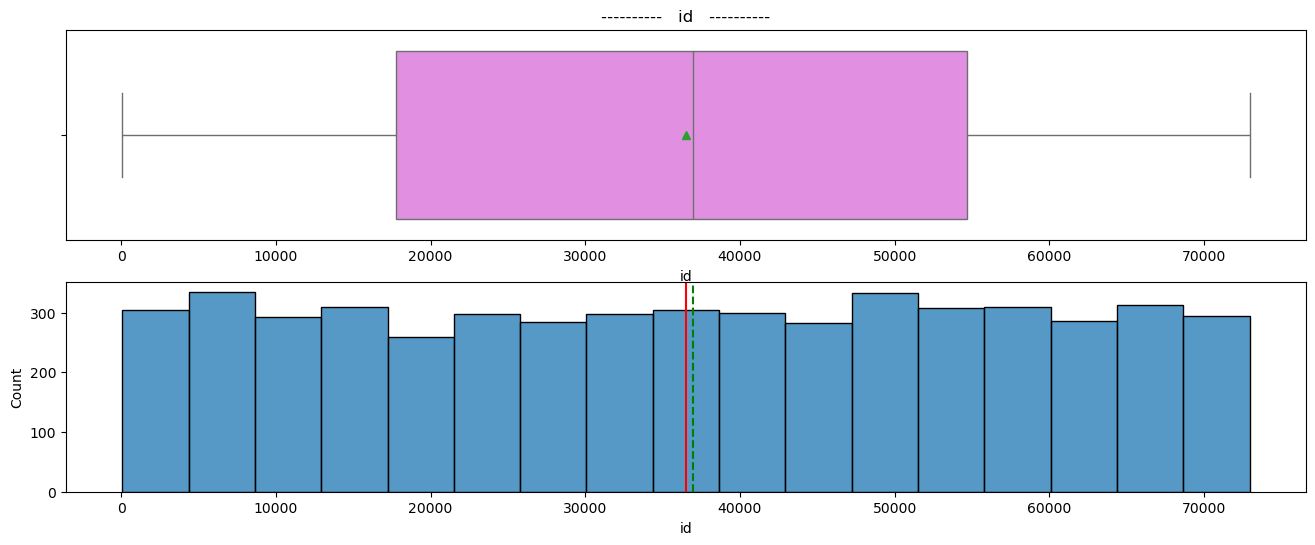

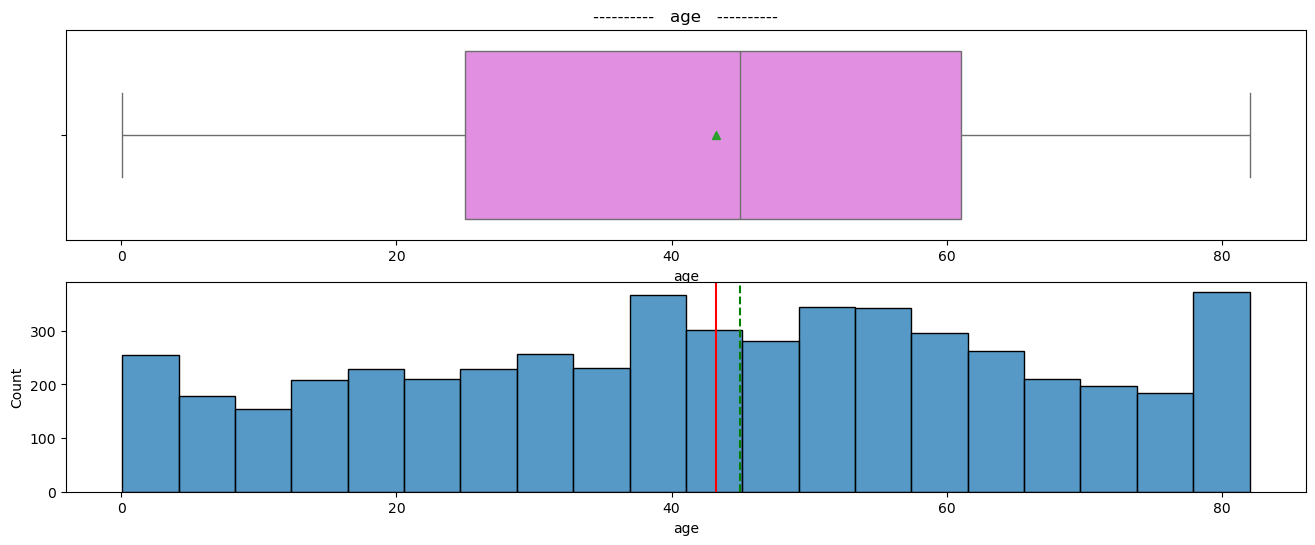

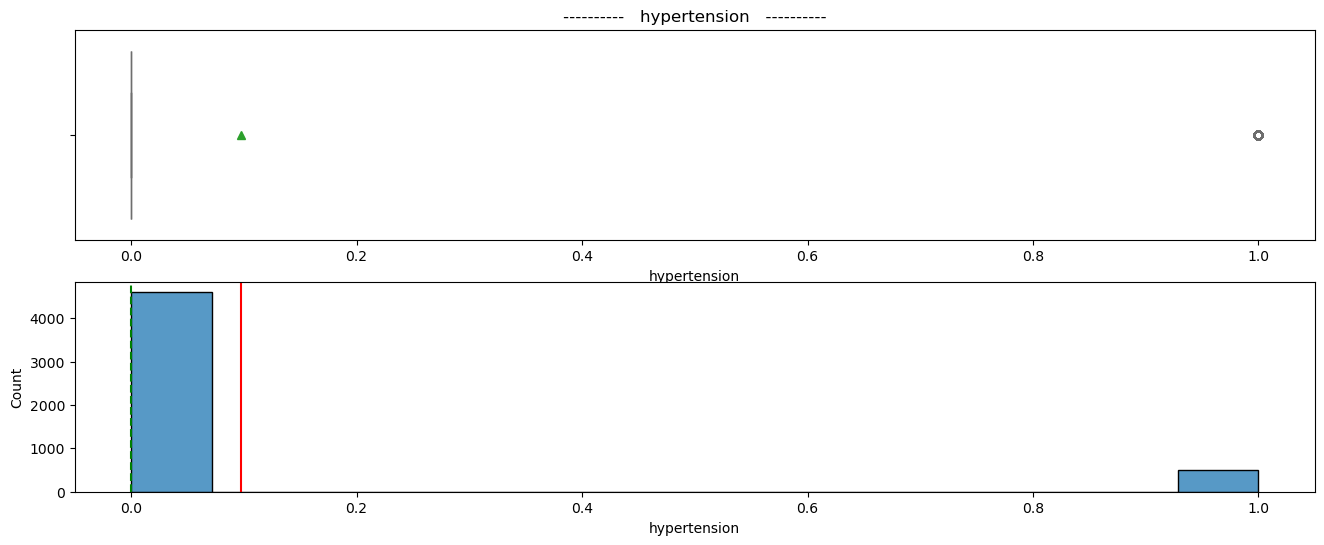

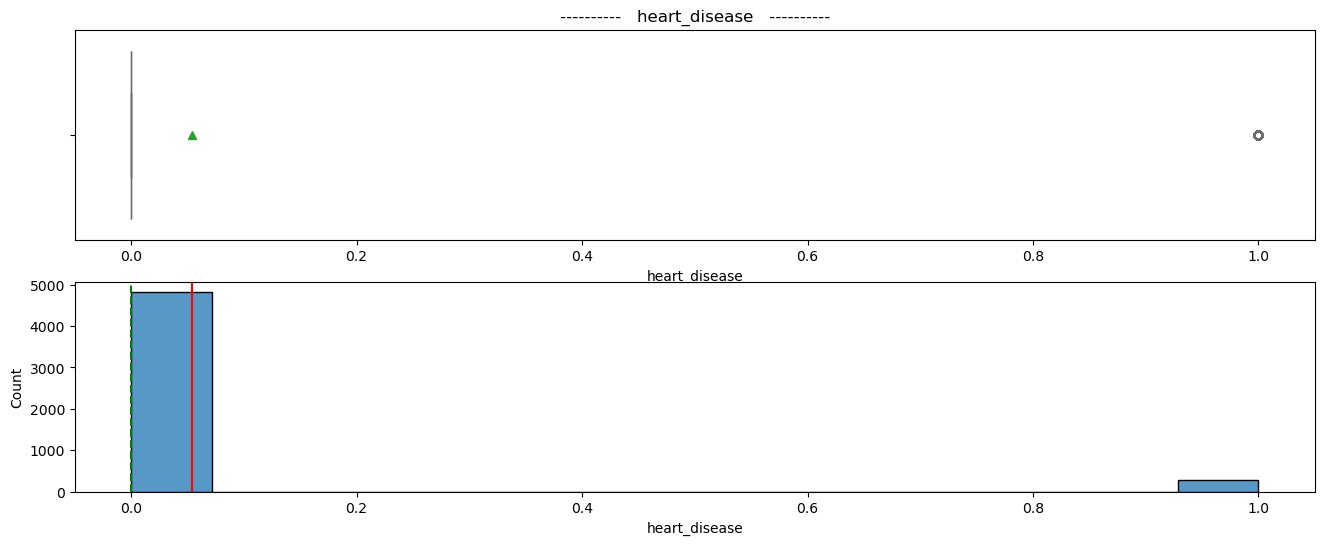

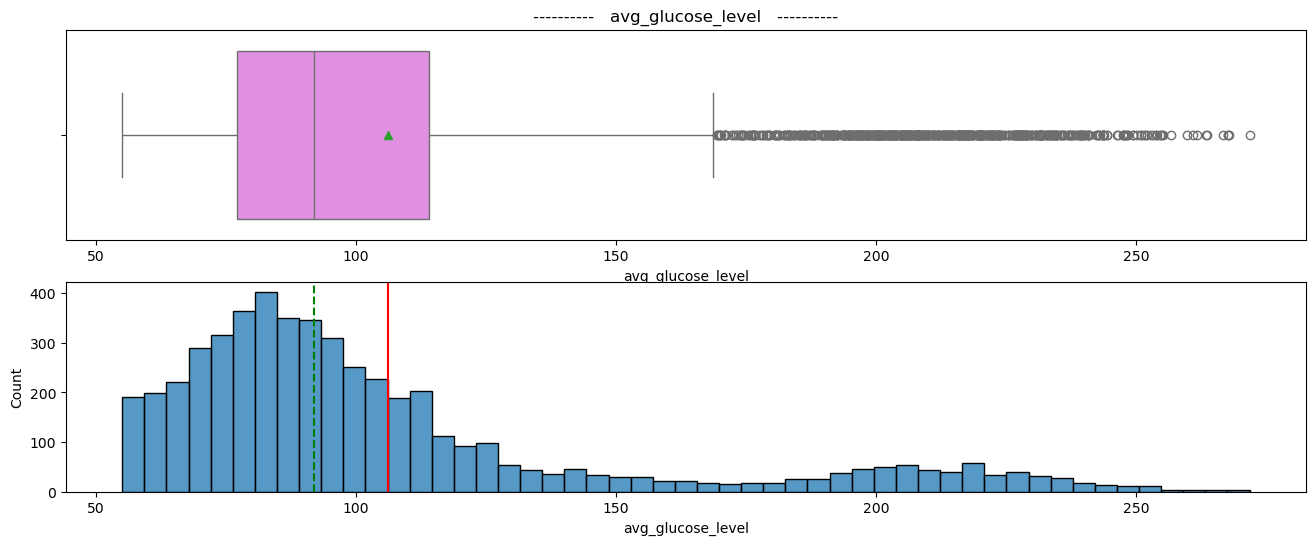

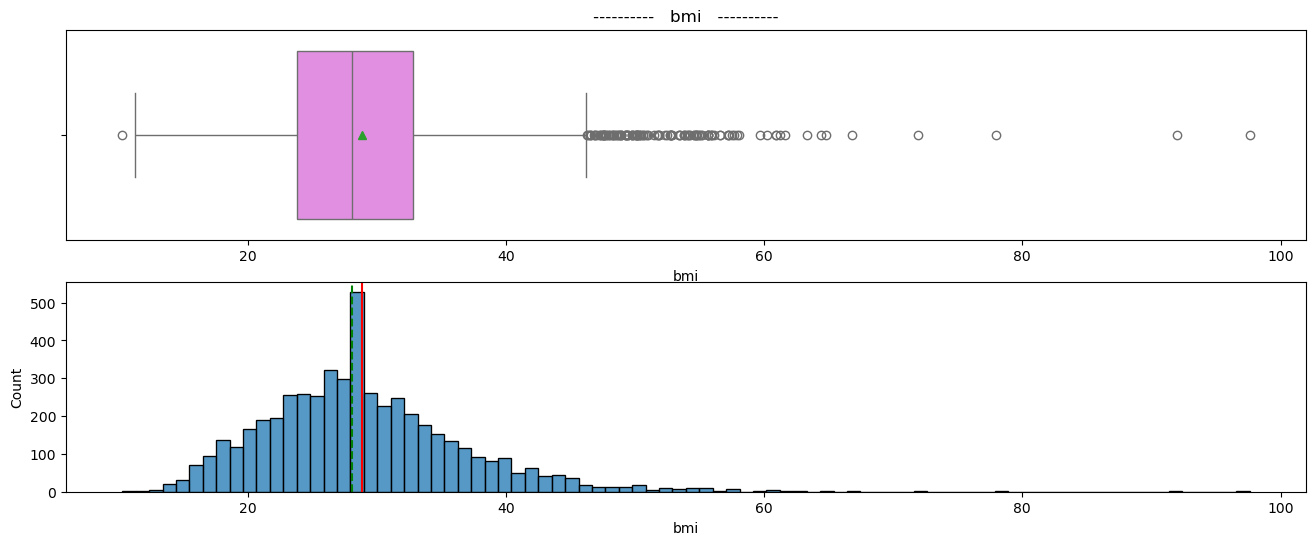

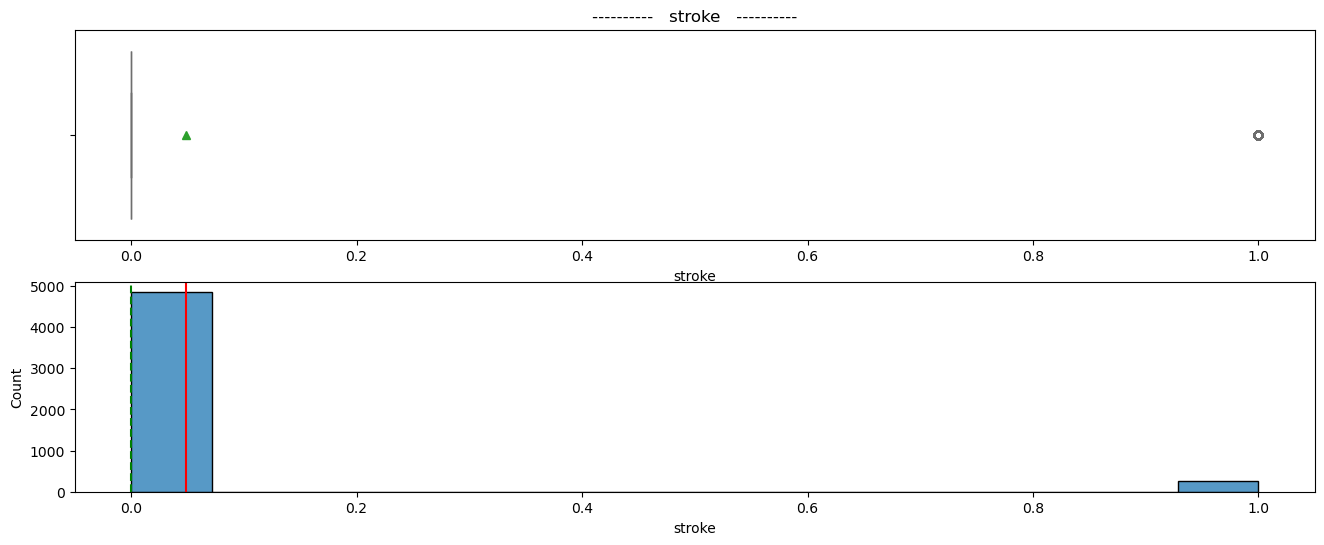

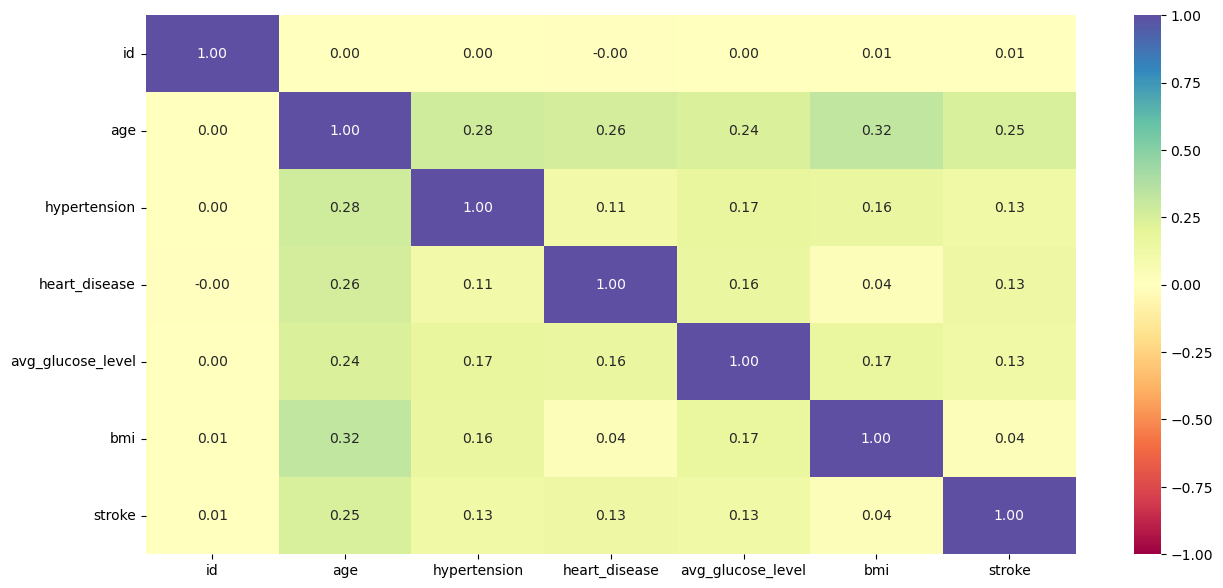

In [8]:
for col in num_features:
    plt.figure(figsize=(16, 6))
    plt.subplot(2, 1, 1)
    plt.title("----------   " + col + "   ----------")
    sns.boxplot(data=df, x=col, showmeans=True, color="violet")
    plt.subplot(2, 1, 2)
    sns.histplot(data=df, x=col)
    plt.axvline(df[col].mean(), color="red", linestyle="-")
    plt.axvline(df[col].median(), color="green", linestyle="--")
    plt.show()



plt.figure(figsize=(15, 7))
sns.heatmap(df[num_features].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [10]:
#RiskFactorAnalysis
print("This analysis shows how much chance does an individual have of getting a stroke filtered by binary medical conditions.")
risk_binary = (
    df.groupby(['hypertension', 'heart_disease'])['stroke']
    .mean()
    .reset_index()
)

risk_binary['stroke_rate_%'] = risk_binary['stroke'] * 100
risk_binary

This analysis shows how much chance does an individual have of getting a stroke filtered by binary medical conditions.


,hypertension,heart_disease,stroke,stroke_rate_%
0,0,0,0.033864,3.386364
1,0,1,0.160377,16.037736
2,1,0,0.122120,12.211982
3,1,1,0.203125,20.312500


In [11]:
risk_gender = (
    df.groupby(['gender'])['stroke']
    .mean()
    .reset_index()
)

risk_gender['stroke_rate_%']=risk_gender['stroke']*100

print('This analysis shows us the chance of getting a stroke filtered by gender.')
risk_gender

This analysis shows us the chance of getting a stroke filtered by gender.


,gender,stroke,stroke_rate_%
0,Female,0.047094,4.709419
1,Male,0.051064,5.106383
2,Other,0.000000,0.000000


In [12]:
print("This analysis shows us the risk of getting a stroke filtered by the bmi level.")
df['bmi_category'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 25, 30, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)
bmi_risk = (
    df.groupby('bmi_category')['stroke']
    .mean()
    .reset_index()
)

bmi_risk['stroke_rate_%'] = bmi_risk['stroke'] * 100
bmi_risk

This analysis shows us the risk of getting a stroke filtered by the bmi level.


/var/folders/d9/msr7g525037gq7yzyxm24kkc0000gn/T/ipykernel_14425/3566847528.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('bmi_category')['stroke']


,bmi_category,stroke,stroke_rate_%
0,Underweight,0.002865,0.286533
1,Normal,0.029412,2.941176
2,Overweight,0.071429,7.142857
3,Obese,0.050713,5.071315


In [10]:
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

Making a random forest model
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       972
           1       0.24      0.32      0.28        50

    accuracy                           0.92      1022
   macro avg       0.60      0.63      0.62      1022
weighted avg       0.93      0.92      0.92      1022

ROC-AUC: 0.8296090534979423


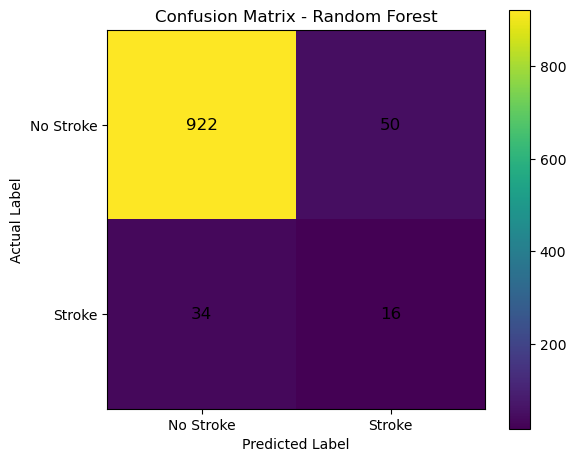

In [11]:
print("Making a random forest model")

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
plt.imshow(cm)
plt.title("Confusion Matrix - Random Forest")
plt.colorbar()

classes = ['No Stroke', 'Stroke']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, cm[i, j],
            horizontalalignment="center",
            verticalalignment="center",
            fontsize=12
        )

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()




Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022

ROC-AUC: 0.8438477366255144


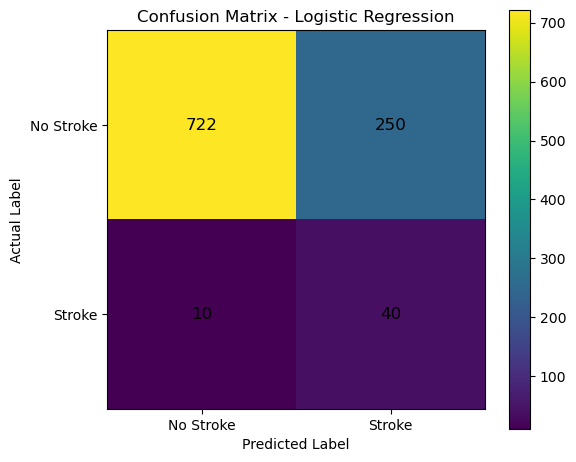

In [14]:
print('Logistic Regression')

X_log = df.drop(columns=['id', 'stroke'])
y_log = df['stroke']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train_log = pd.get_dummies(X_train_log, drop_first=True)
X_test_log = pd.get_dummies(X_test_log, drop_first=True)

X_test_log = X_test_log.reindex(columns=X_train_log.columns, fill_value=0)
scaler = StandardScaler()

X_train_scaled_log = scaler.fit_transform(X_train_log)
X_test_scaled_log = scaler.transform(X_test_log)
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear',
    random_state=42
)
log_reg.fit(X_train_scaled_log, y_train_log)

threshold = 0.5
y_pred_custom = (y_prob_log >= threshold).astype(int)
y_prob_log = log_reg.predict_proba(X_test_scaled_log)[:, 1]

print(classification_report(y_test_log, y_pred_custom))
print("ROC-AUC:", roc_auc_score(y_test_log, y_prob_log))

cm_log = confusion_matrix(y_test_log, y_pred_custom)

plt.figure(figsize=(6, 5))
plt.imshow(cm_log)
plt.title("Confusion Matrix - Logistic Regression")
plt.colorbar()

classes = ['No Stroke', 'Stroke']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, cm_log[i, j],
            horizontalalignment="center",
            verticalalignment="center",
            fontsize=12
        )

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()
